In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import special_ortho_group
import seaborn as sns
import pandas as pd

# Goal 
To generate data (6 distinct groups) with trajectory in time

data_structure = [[n_1 data], [n_2 data]]

In [2]:
# c = number of class
# t = timepoints
# d = dimention of data
# a = amplitude

c = 2
t = 1000
d = 2
to_d = 10
a = 1

In [3]:
theta = np.linspace(0, 2*np.pi, c+1)
theta = theta[:-1]
theta


array([0.        , 3.14159265])

In [4]:
def find_coords(theta, class_num):
    x = a * np.cos(theta[class_num])
    y = a * np.sin(theta[class_num])
    return [0, 0]

def transformation_to_n_dim(data, from_d, to_d):
    new_data = np.zeros((data.shape[0], to_d, data.shape[2]))

    for i in range(data.shape[0]):
        for j in range(data.shape[2]):
            # print(data[i, :, j].shape)
            new_data[i, :, j] = np.hstack((data[i, :, j], np.zeros(to_d - from_d)))
    
    return new_data

random_rotation_matrix = special_ortho_group.rvs(to_d, random_state=42)

def rotation(data, seed = 42, d = to_d, random_rotation_matrix = random_rotation_matrix):
    random_rotated = np.zeros((data.shape[0], to_d, data.shape[2]))
    for i in range(data.shape[0]):
        for j in range(data.shape[2]):
            random_rotated[i, :, j] = np.matmul(data[i, :, j], random_rotation_matrix)

    return random_rotated

In [5]:
data = np.zeros((c, d, t))

In [6]:
# Initial location
for i in range(c):
    data[i, :, 0] = find_coords(theta, i)
    print(find_coords(theta, i))    

[0, 0]
[0, 0]


In [7]:
def rotation_matrix(matrix, degree):
    deg = np.radians(degree)
    rotation_operation = np.array([[np.cos(deg), -np.sin(deg)], [np.sin(deg), np.cos(deg)]])
    product = rotation_operation @ matrix
    return product

def generate_data(c, t, d, to_d, a, theta):
    data = np.zeros((c, d, t))

    # Initial location
    for i in range(c):
        data[i, :, 0] = find_coords(theta, i)
        # print(find_coords(theta, i))

    for i in range(t):
        if i == 0:
            continue
        data[0, :, i] = rotation_matrix(
            data[0, :, i - 1], 1
        ) * 1.00 + np.random.normal(0, 0.01, (1, d))
        data[1, :, i] = rotation_matrix(
            data[1, :, i - 1], -1
        ) * 1.00 + np.random.normal(0, 0.01, (1, d))

    data = transformation_to_n_dim(data, d, to_d)

    rotated = rotation(data)

    return rotated

In [8]:
from sklearn.decomposition import PCA
data_train = []
data_test = []

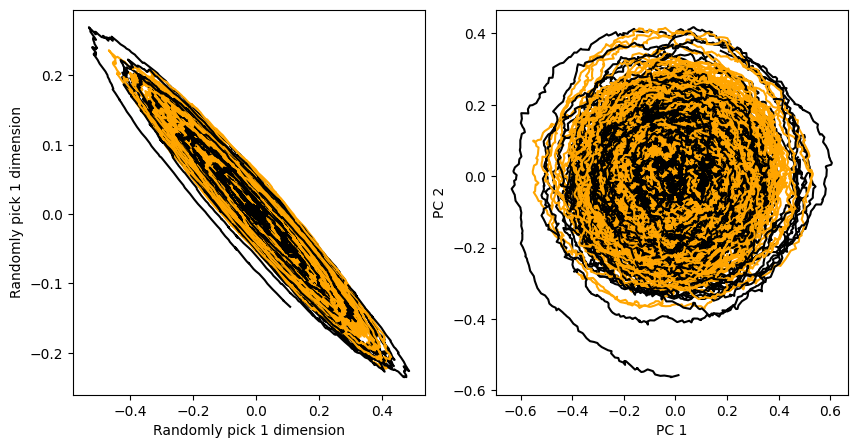

(2, 10, 100)
(2, 2, 100)


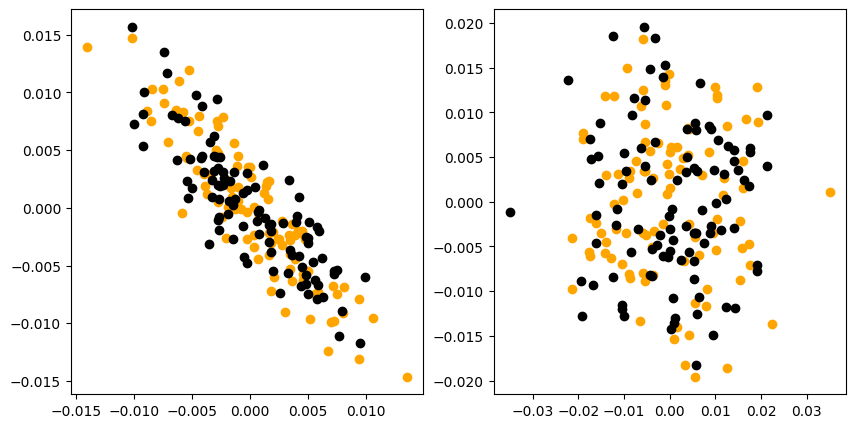

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

n = 100

average = np.zeros((c, to_d, n))
average_PCA = np.zeros((c, d, n))
color = ["orange", "black", "green", "blue", "red", "purple"]

series = np.zeros((c, to_d, t, n))
series_PCA = np.zeros((c, d, t, n))

def generate_to_plot_PCA(n):
    for j in range(n):
        gen_data = generate_data(c, t, d, to_d, a, theta)

        pca = PCA(n_components=2)
        
        all_data = np.hstack(
            (
                gen_data[0, :5, :],
                gen_data[1, :5, :],
            )
        )
        # print(all_data.shape)

        for i in range(c):
            recovered_data = pca.fit_transform(all_data.T).T
            # print(recovered_data.shape)
            ax[0].plot(gen_data[i, 4, :], gen_data[i, 5, :], color=color[i])
            ax[0].set_xlabel("Randomly pick 1 dimension")
            ax[0].set_ylabel("Randomly pick 1 dimension")

        for i in range(c):
            epoch_data = gen_data.shape[2]

            ax[1].plot(
                recovered_data[0, i * epoch_data : (i + 1) * (epoch_data)],
                recovered_data[1, i * epoch_data : (i + 1) * (epoch_data)],
                color=color[i],
            )
            ax[1].set_xlabel("PC 1")
            ax[1].set_ylabel("PC 2")

        recovered_data_unstack = np.zeros((c, d, gen_data.shape[2]))

        for i in range(c):
            recovered_data_unstack[i, :, :] = recovered_data[
                :, i * epoch_data : (i + 1) * (epoch_data)
            ]

        # print (gen_data.shape)
        # print (recovered_data_unstack.shape)

        # get the average of each class (for 1000 timepoints)
        for i in range(c):
            average[i, :, j] = np.mean(gen_data[i, :, :], axis=1)
            average_PCA[i, :, j] = np.mean(recovered_data_unstack[i, :, :], axis=1)

            series[i, :, :, j] = gen_data[i, :, :]
            series_PCA[i, :, :, j] = recovered_data_unstack[i, :, :]

        # for i in range(c):
        #     average[n, i, :] = np.mean(gen_data[i, :, :], axis = 1)
        #     average_PCA[n, i, :] = np.array([np.mean(recovered_data[0, :], axis = 1), np.mean(recovered_data[1, :], axis = 1)]).T

        # print(average.shape)
        # print(recovered_data_1.shape)
        # plt.scatter(average[:, 0], average[:, 1], color = color)

        # for i in range((recovered_data_1.shape[0])):
        #     data_train.append(recovered_data_1[i, :])
        #     data_test.append(i)


generate_to_plot_PCA(n)

plt.show()

print(average.shape)
print(average_PCA.shape)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i in range(c):
    ax[0].scatter(average[i, 0, :], average[i, 1, :], color=color[i])
    ax[1].scatter(average_PCA[i, 0, :], average_PCA[i, 1, :], color=color[i])

In [10]:
print(average.shape)
print(average_PCA.shape)

print(series.shape)
print(series_PCA.shape)

(2, 10, 100)
(2, 2, 100)
(2, 10, 1000, 100)
(2, 2, 1000, 100)


In [11]:
series_flatten = np.zeros((c, to_d * t, n))
series_PCA_flatten = np.zeros((c, d * t, n))

for i in range(c):
    for j in range(n):
        series_flatten[i, :, j] = series[i, :, :, j].flatten()
        series_PCA_flatten[i, :, j] = series_PCA[i, :, :, j].flatten()

In [12]:
print(series_flatten.shape)
print(series_PCA_flatten.shape)

(2, 10000, 100)
(2, 2000, 100)


[0 0 0 0 0]
Accuracy: (0.55, 0.5)


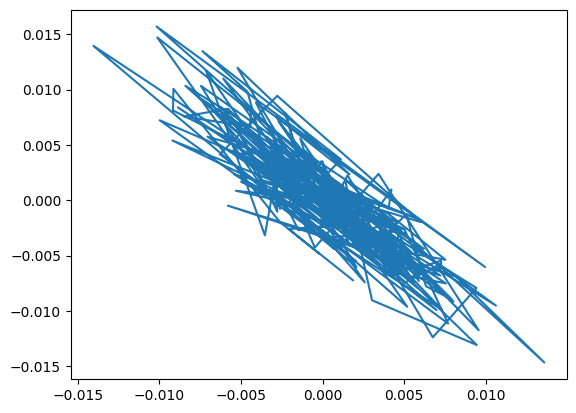

In [13]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# print(average.shape)
# print(average_PCA.shape)

average_stack = np.zeros((to_d, c*n))
average_stack = np.hstack((average[0, :2, :], average[1, :2, :])).T

average_PCA_stack = np.zeros((d, c*n))
average_PCA_stack = np.hstack((average_PCA[0, :, :], average_PCA[1, :, :])).T

answer = np.array([0]*n + [1]*n)
answer_pca = np.array([0]*n + [1]*n)

plt.plot(average_stack[:, 0], average_stack[:, 1])
print(answer[:5])

average_stack_train, average_stack_test, answer_train, answer_test = train_test_split(
    average_stack, answer, test_size=0.2, random_state=42, shuffle=True)

average_PCA_stack_train, average_PCA_stack_test, answer_pca_train, answer_pca_test = train_test_split(
    average_PCA_stack, answer_pca, test_size=0.2, random_state=42, shuffle=True)

# Initialize and train the SVM classifier
clf = svm.SVC()
clf_pca = svm.SVC()

clf.fit(average_stack_train, answer_train)
clf_pca.fit(average_PCA_stack_train, answer_pca_train)

# Now you can use clf to make predictions on the test set
predictions = clf.predict(average_stack_test)
predictions_pca = clf_pca.predict(average_PCA_stack_test)

accuracy = accuracy_score(answer_test, predictions)
accuracy_pca = accuracy_score(answer_pca_test, predictions_pca)

print(f"Accuracy: {accuracy, accuracy_pca}")

In [14]:
series_flatten_stack = np.zeros((to_d * t, c*n))
series_flatten_stack = np.hstack((series_flatten[0, :, :], series_flatten[1, :, :])).T

series_PCA_flatten_stack = np.zeros((d * t, c*n))
series_PCA_flatten_stack = np.hstack((series_PCA_flatten[0, :, :], series_PCA_flatten[1, :, :])).T

answer_series = np.array([0]*n + [1]*n)
answer_series_pca = np.array([0]*n + [1]*n)

series_flatten_stack_train, series_flatten_stack_test, answer_series_train, answer_series_test = train_test_split(
    series_flatten_stack, answer_series, test_size=0.2, random_state=42, shuffle=True)

series_PCA_flatten_stack_train, series_PCA_flatten_stack_test, answer_series_pca_train, answer_series_pca_test = train_test_split(
    series_PCA_flatten_stack, answer_series_pca, test_size=0.2, random_state=42, shuffle=True)

clf_series = svm.SVC()
clf_series_pca = svm.SVC()

clf_series.fit(series_flatten_stack_train, answer_series_train)
clf_series_pca.fit(series_PCA_flatten_stack_train, answer_series_pca_train)

predictions_series = clf_series.predict(series_flatten_stack_test)
predictions_series_pca = clf_series_pca.predict(series_PCA_flatten_stack_test)

accuracy_series = accuracy_score(answer_series_test, predictions_series)
accuracy_series_pca = accuracy_score(answer_series_pca_test, predictions_series_pca)

print(f"Accuracy: {accuracy_series, accuracy_series_pca}")

Accuracy: (0.975, 0.975)


In [15]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)

series_nb, series_flatten_nb_test, answer_nb_train, answer_nb_test = train_test_split(
    series_flatten_stack, answer_series, test_size=0.9, random_state=42, shuffle=True
)

neigh.fit(series_nb, answer_nb_train)
neigh_predictions = neigh.predict(series_flatten_nb_test)
print("accuracy", accuracy_score(answer_nb_test, neigh_predictions))

# series_PCA_flatten_stack_train, series_PCA_flatten_stack_test, answer_series_pca_train, answer_series_pca_test = train_test_split(
# series_PCA_flatten_stack, answer_series_pca, test_size=0.2, random_state=42, shuffle=True)

accuracy 0.8222222222222222


In [16]:
from sklearn.neural_network import MLPClassifier
clf_nn = MLPClassifier(random_state=1, max_iter=300).fit(average_stack_train, answer_train)
clf_nn_pca = MLPClassifier(random_state=1, max_iter=300).fit(average_PCA_stack_train, answer_pca_train)

predictions_nn = clf_nn.predict(average_stack_test)
predictions_nn_pca = clf_nn_pca.predict(average_PCA_stack_test)

accuracy_nn = accuracy_score(answer_test, predictions_nn)
accuracy_nn_pca = accuracy_score(answer_pca_test, predictions_nn_pca)

print(f"Accuracy: {accuracy_nn, accuracy_nn_pca}")

Accuracy: (0.525, 0.525)


In [17]:
clf_series_nn = MLPClassifier(random_state=1, max_iter=300).fit(series_flatten_stack_train, answer_series_train)
clf_series_pca_nn = MLPClassifier(random_state=1, max_iter=300).fit(series_PCA_flatten_stack_train, answer_series_pca_train)

predictions_series_nn = clf_series_nn.predict(series_flatten_stack_test)
predictions_series_pca_nn = clf_series_pca_nn.predict(series_PCA_flatten_stack_test)

accuracy_series_nn = accuracy_score(answer_series_test, predictions_series_nn)
accuracy_series_pca_nn = accuracy_score(answer_series_pca_test, predictions_series_pca_nn)

print(f"Accuracy: {accuracy_series_nn, accuracy_series_pca_nn}")

Accuracy: (1.0, 1.0)


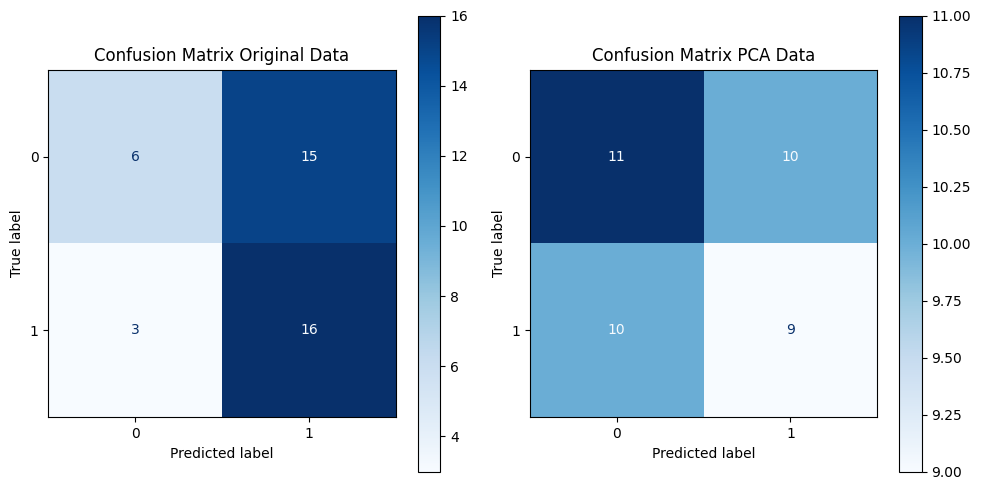

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix for original data
cm = confusion_matrix(answer_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax[0])
ax[0].set_title('Confusion Matrix Original Data')

# Assuming predictions_pca and clf_pca are defined similarly for the PCA data
cm_pca = confusion_matrix(answer_test, predictions_pca, labels=clf_pca.classes_)
disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=clf_pca.classes_)
disp_pca.plot(cmap=plt.cm.Blues, ax=ax[1])
ax[1].set_title('Confusion Matrix PCA Data')

plt.tight_layout()
plt.show()

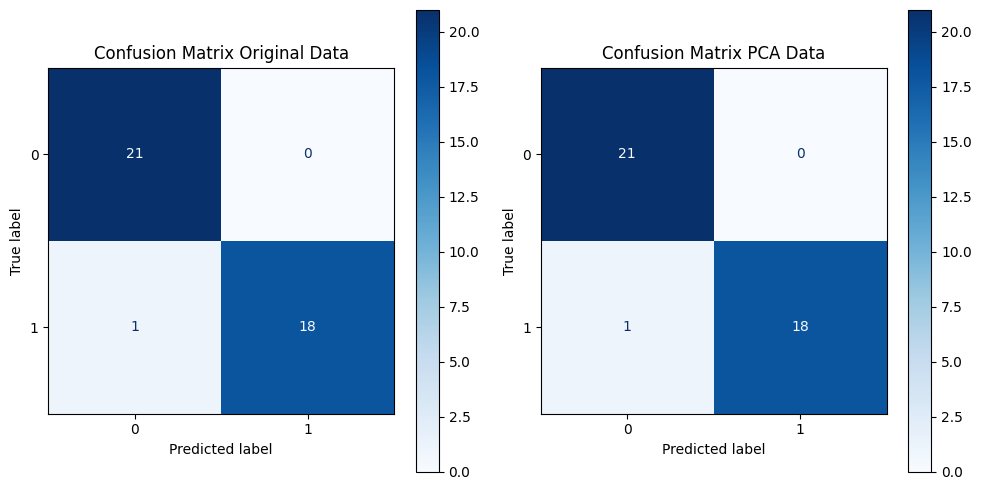

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix for original data
cm_series = confusion_matrix(answer_series_test, predictions_series, labels=clf_series.classes_)
disp_series = ConfusionMatrixDisplay(confusion_matrix=cm_series, display_labels=clf.classes_)
disp_series.plot(cmap=plt.cm.Blues, ax=ax[0])
ax[0].set_title('Confusion Matrix Original Data')

# Assuming predictions_pca and clf_pca are defined similarly for the PCA data
cm_pca_series = confusion_matrix(answer_series_pca_test, predictions_series_pca, labels=clf_series_pca.classes_)
disp_pca_series = ConfusionMatrixDisplay(confusion_matrix=cm_pca_series, display_labels=clf_pca.classes_)
disp_pca_series.plot(cmap=plt.cm.Blues, ax=ax[1])
ax[1].set_title('Confusion Matrix PCA Data')

plt.tight_layout()
plt.show()

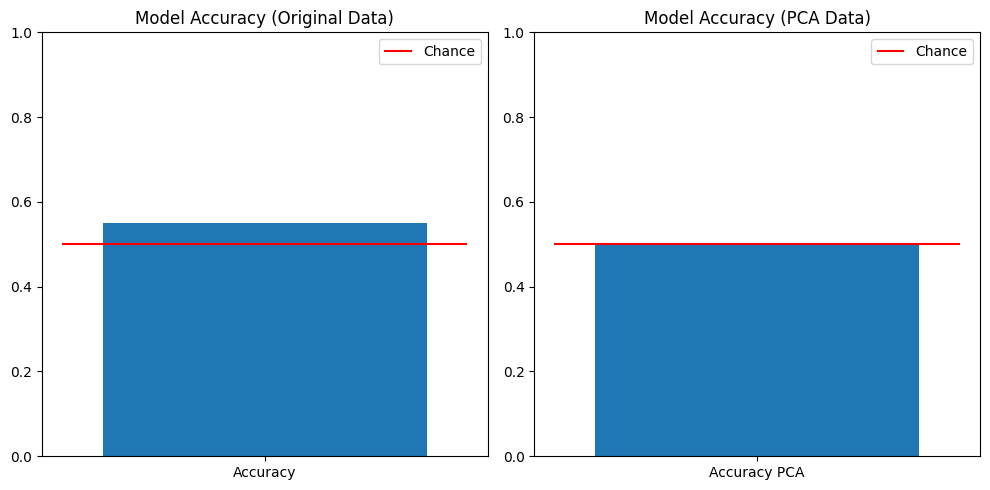

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Assuming accuracy and accuracy_pca are defined
# Plot accuracy for the original model
ax[0].bar(['Accuracy'], [accuracy])
ax[0].set_ylim(0, 1)
ax[0].set_title('Model Accuracy (Original Data)')
ax[0].hlines(0.5, -0.5, 0.5, colors='r')
ax[0].legend(['Chance'])

# Plot accuracy for the PCA model
ax[1].bar(['Accuracy PCA'], [accuracy_pca])
ax[1].set_ylim(0, 1)
ax[1].set_title('Model Accuracy (PCA Data)')
ax[1].hlines(0.5, -0.5, 0.5, colors='r')
ax[1].legend(['Chance'])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

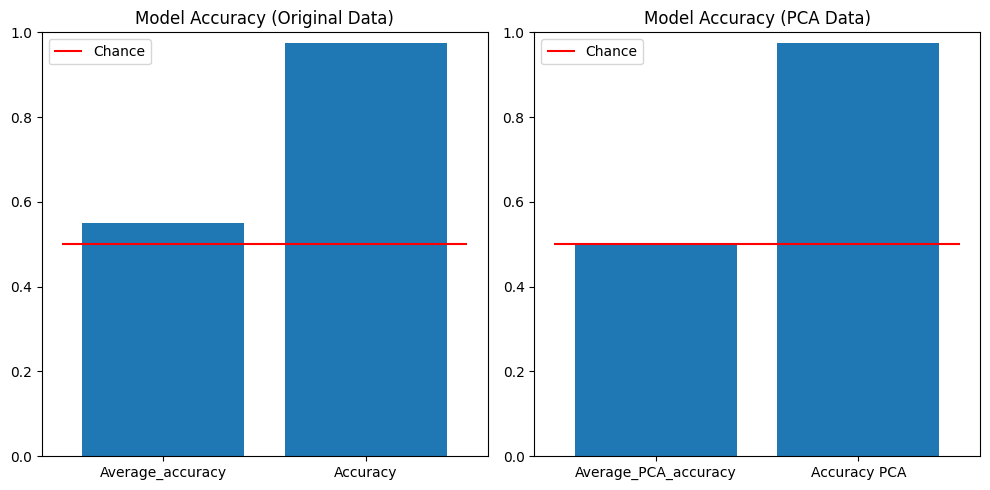

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Assuming accuracy and accuracy_pca are defined
# Plot accuracy for the original model
ax[0].bar(['Average_accuracy', 'Accuracy'], [accuracy,accuracy_series])
ax[0].set_ylim(0, 1)
ax[0].set_title('Model Accuracy (Original Data)')
ax[0].hlines(0.5, -0.5, 1.5, colors='r')
ax[0].legend(['Chance'])

# Plot accuracy for the PCA model
ax[1].bar(['Average_PCA_accuracy','Accuracy PCA'], [accuracy_pca, accuracy_series_pca
])
ax[1].set_ylim(0, 1)
ax[1].set_title('Model Accuracy (PCA Data)')
ax[1].hlines(0.5, -0.5, 1.5, colors='r')
ax[1].legend(['Chance'])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()